In [0]:
import pandas as pd

In [0]:
df_train = pd.read_json('train.json')

In [7]:
df_train.head()

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

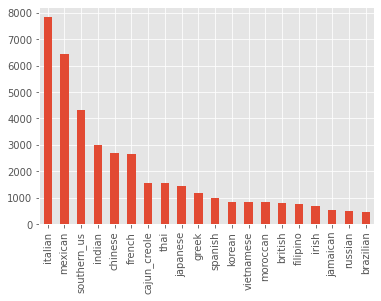

In [10]:
df_train['cuisine'].value_counts().plot(kind='bar')

In [0]:
from collections import Counter

In [0]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [13]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [14]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

top1  ...                top10
greek               salt  ...               pepper
southern_us         salt  ...           buttermilk
filipino            salt  ...  ground black pepper
indian              salt  ...                  oil
jamaican            salt  ...        garlic cloves
spanish             salt  ...               pepper
italian             salt  ...               butter
mexican             salt  ...       corn tortillas
chinese        soy sauce  ...            scallions
british             salt  ...           large eggs
thai          fish sauce  ...     fresh lime juice
vietnamese    fish sauce  ...        vegetable oil
cajun_creole        salt  ...                water
brazilian           salt  ...             tomatoes
french              salt  ...  ground black pepper
japanese       soy sauce  ...               ginger
irish               salt  ...              carrots
korean         soy sauce  ...            scallions
moroccan            salt  ...              paprika
russian             salt  ...           large eggs

[20 rows x 10 columns]

In [0]:
import re
import base64

In [0]:
import pdb

In [0]:
def repl(m):
    ingredient = m.groups()[0]
    image_path = 'img/' + ingredient + '.png'
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    return '<td><img width=100 src="data:image/png;base64,{}"></td>'.format(encoded_string.decode('utf-8'))

table_with_images = re.sub("<td>([ \-\w]+)</td>", repl, top10.to_html())

In [0]:
from IPython.display import HTML

In [0]:
HTML(table_with_images)

In [0]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

In [22]:
df_train.head()

id  ...                                    all_ingredients
0  10259  ...  romaine lettuce;black olives;grape tomatoes;ga...
1  25693  ...  plain flour;ground pepper;salt;tomatoes;ground...
2  20130  ...  eggs;pepper;salt;mayonaise;cooking oil;green c...
3  22213  ...                     water;vegetable oil;wheat;salt
4  13162  ...  black pepper;shallots;cornflour;cayenne pepper...

[5 rows x 4 columns]

In [23]:
df_train['all_ingredients'].str.contains('garlic cloves')

0        False
1        False
2        False
3        False
4        False
         ...  
39769    False
39770    False
39771    False
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

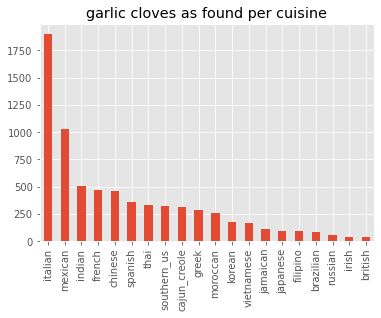

In [24]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='garlic cloves as found per cuisine')

In [0]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort(inplace=True)
relative_freq.plot(kind='bar')


In [0]:
from ipykernel import kernelapp as app

In [31]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

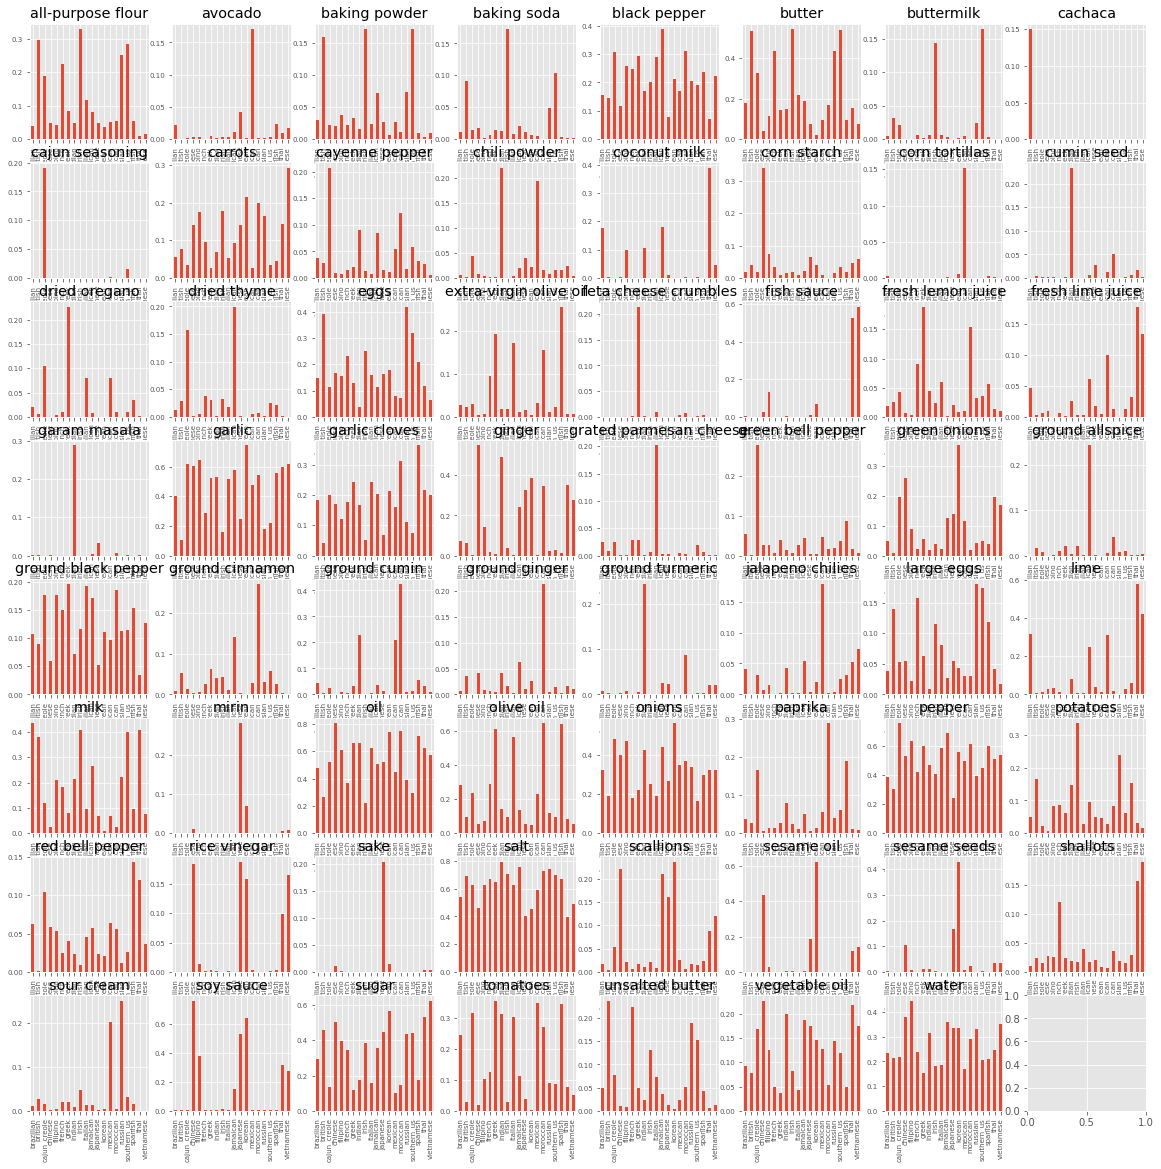

In [32]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()

In [0]:
X = cv.fit_transform(df_train['all_ingredients'].values)

In [37]:
X.shape

(39774, 3010)

In [38]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)


In [42]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [43]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.linear_model import LogisticRegression

In [48]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logistic.score(X_test, y_test)

0.7846637335009428

Text(0.5, 64.84999999999997, 'Predicted label')

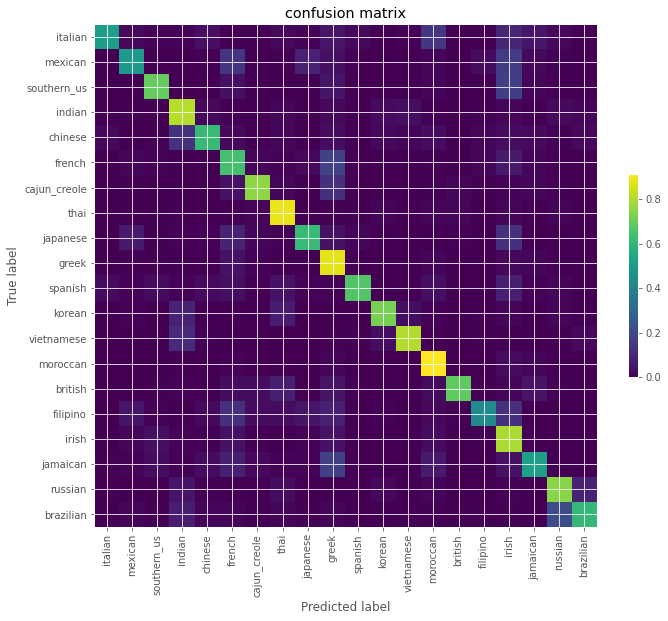

In [50]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import classification_report

In [52]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.78      0.51      0.62       112
     mexican       0.58      0.49      0.53       153
 southern_us       0.77      0.70      0.73       302
      indian       0.79      0.81      0.80       542
     chinese       0.69      0.62      0.65       165
      french       0.59      0.65      0.62       508
cajun_creole       0.78      0.76      0.77       229
        thai       0.84      0.89      0.86       556
    japanese       0.61      0.61      0.61       122
       greek       0.83      0.88      0.85      1552
     spanish       0.84      0.67      0.74       114
      korean       0.83      0.73      0.77       300
  vietnamese       0.79      0.81      0.80       177
    moroccan       0.91      0.91      0.91      1302
     british       0.88      0.69      0.77       191
    filipino       0.59      0.43      0.50        97
       irish       0.72      0.80      0.76       889
    jamaican       0.57    